In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/responseFile_8.csv')

In [4]:
df.head()

,Elapsed Time (ms),Response Time (ms),Alphabet,Correct,Error Type,Pitch,Yaw,Roll
0,2012,2000,X,Yes,None,348.3079,180.7174,356.133900
1,2737,724,a,Yes,None,348.3542,180.5480,356.278400
2,4824,808,M,Yes,None,348.3983,180.1268,356.645200
3,8025,2000,X,Yes,None,348.2939,173.3788,2.458839
4,10033,2000,L,No,Omission,356.4798,134.7962,5.397765


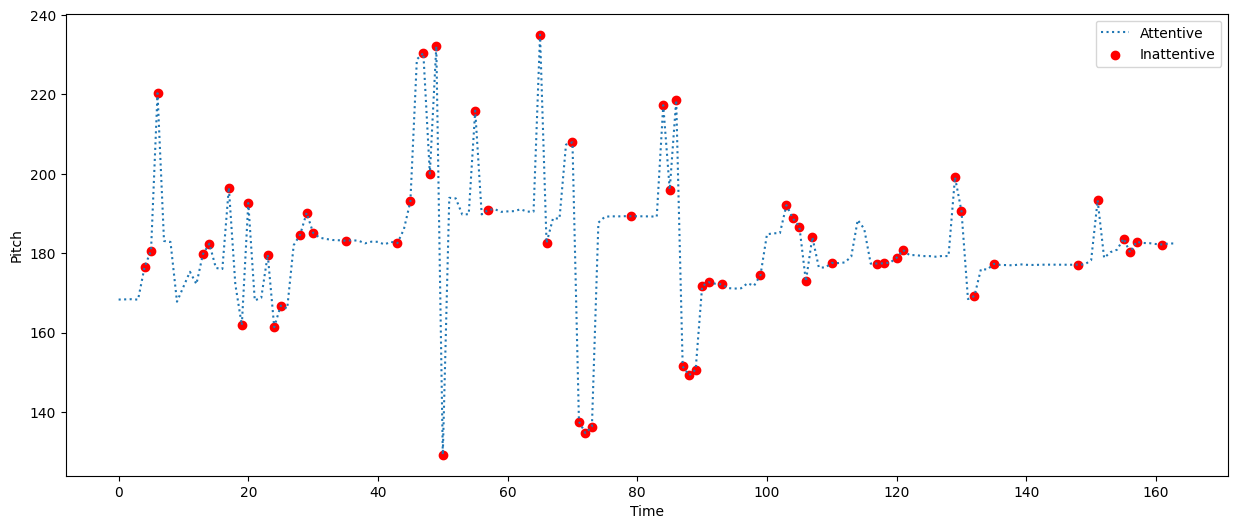

In [12]:
import seaborn as sns
plt.figure(figsize=(15, 6))
df[' Pitch'] = round(((df[' Pitch'] + 180) % 360), 2)
df[' Roll'] = round(((df[' Roll'] + 180) % 360), 2)
incorrect = df[df[' Correct'] == ' No']
plt.plot(df.index, df[' Pitch'], label='Attentive', linestyle='dotted')
plt.scatter(incorrect.index, incorrect[' Pitch'], label = "Inattentive", color='red')
plt.xlabel('Time')
plt.ylabel('Pitch')
plt.legend()
plt.show()

In [80]:
percentage_values

aAttentive
Attentive        91.497976
Not Attentive     8.502024
Name: proportion, dtype: float64

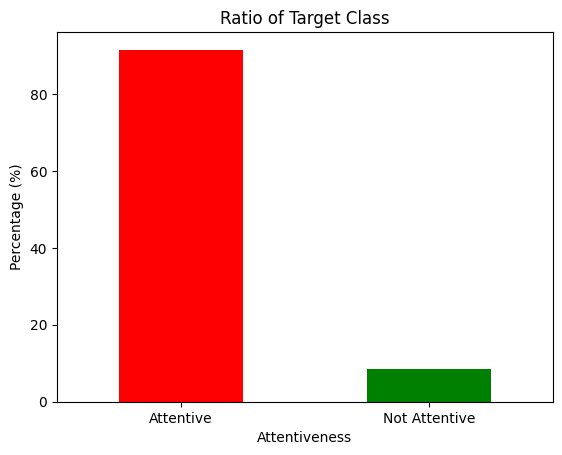

In [79]:
# Calculate percentage values
total_count = len(df)
percentage_values = df['Attentive'].value_counts(normalize=True) * 100

label_mapping = {0: 'Not Attentive', 1: 'Attentive'}
df['aAttentive'] = df['Attentive'].map(label_mapping)

percentage_values = df['aAttentive'].value_counts(normalize=True) * 100

# Plotting the histogram
percentage_values.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Attentiveness')
plt.ylabel('Percentage (%)')
plt.title('Ratio of Target Class')
plt.xticks(rotation=0)
plt.show()


In [38]:
df[df['Attentive'] == 0]['std_yaw'].mean()

14.767142857142858

In [39]:
df[df['Attentive'] == 1]['std_yaw'].mean()

6.930940265486726

In [102]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1,1))
data = pd.read_csv('./data/timeFile_1.csv')

data[' Pitch'] = round(((data[' Pitch'] + 180) % 360), 2)
data[' Roll'] = round(((data[' Roll'] + 180) % 360), 2)
# data[' Yaw'] = round(((data[' Yaw'] + 180) % 360), 2)

# Transform 'Pitch' and 'Roll' using sine and cosine transformations
data['Pitch_sin'] = np.sin(np.radians(data[' Pitch']))
data['Pitch_cos'] = np.cos(np.radians(data[' Pitch']))
data['Roll_sin'] = np.sin(np.radians(data[' Roll']))
data['Roll_cos'] = np.cos(np.radians(data[' Roll']))
data['Yaw_sin'] = np.sin(np.radians(data[' Yaw']))
data['Yaw_cos'] = np.cos(np.radians(data[' Yaw']))

# Standardize 'Yaw'
# columns_to_standardize_yaw = [' Yaw']
# data[columns_to_standardize_yaw] = scaler.fit_transform(data[columns_to_standardize_yaw])

# Display the first few rows of the modified data
data.head()


,Elapsed Time (ms),Alphabet,Pitch,Yaw,Roll,Pitch_sin,Pitch_cos,Roll_sin,Roll_cos,Yaw_sin,Yaw_cos
0,0,,180.0,0.259005,177.74,1.224647e-16,-1.0,0.039434,-0.999222,0.00452,0.99999
1,0,,180.0,0.259005,177.74,1.224647e-16,-1.0,0.039434,-0.999222,0.00452,0.99999
2,0,,180.0,0.259005,177.74,1.224647e-16,-1.0,0.039434,-0.999222,0.00452,0.99999
3,0,,180.0,0.259005,177.74,1.224647e-16,-1.0,0.039434,-0.999222,0.00452,0.99999
4,0,,180.0,0.259005,177.74,1.224647e-16,-1.0,0.039434,-0.999222,0.00452,0.99999


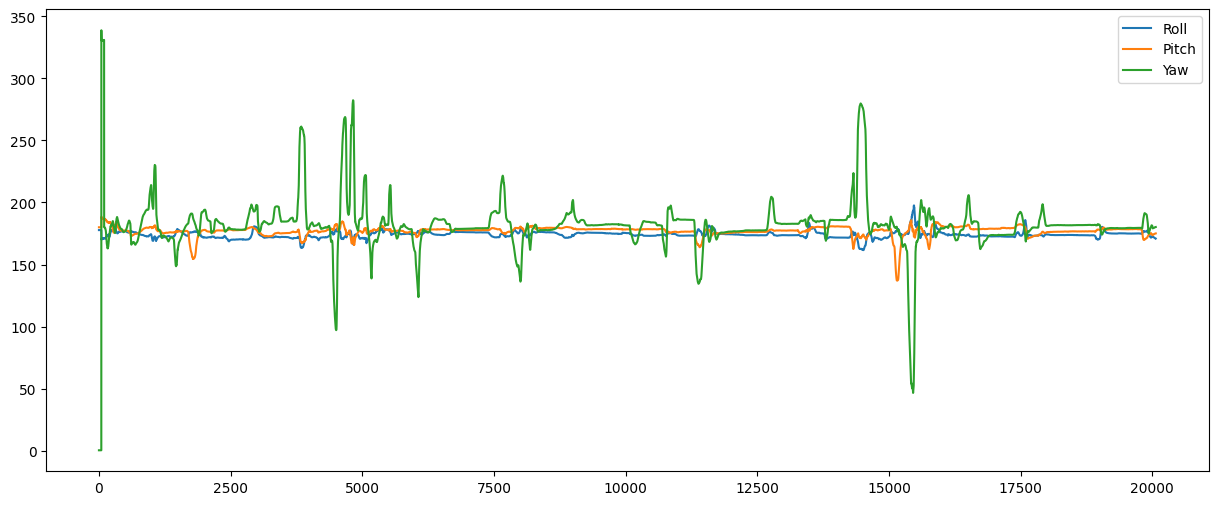

In [103]:
# data['Pitch_sin'].plot()
# data['Roll_sin'].plot()
plt.figure(figsize=(15, 6))
data[' Roll'].plot( label = 'Roll')
data[' Pitch'].plot( label = 'Pitch')
data[' Yaw'].plot( label = 'Yaw')
 
plt.legend()
# data['Pitch_cos'].plot()
# data['Roll_cos'].plot()
# data['Yaw_cos'].plot()
# data['Yaw_sin'].plot()
